In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("iGMRF.jl");
include("dataGen.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 6;
m₂ = 6;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [3]:
grid_target = generateTargetGrid(F);

In [4]:
grid_target[:, :, 1]

6×6 Matrix{Float64}:
  0.150578     0.125958   -0.00443581   0.0419361    0.000996108  -0.0601342
  0.213952     0.0870288   0.0466061   -0.0489566   -0.0310282    -0.0398228
  0.144839     0.0709377   0.0674184   -0.0783321   -0.0460267    -0.157605
 -0.00832208   0.0660304   0.084337    -0.00656615  -0.137013     -0.108068
  0.0790171    0.120558    0.0679903   -0.114431    -0.0765482    -0.0770912
  0.120752    -0.0833394   0.00551236  -0.0666542   -0.170395     -0.179677

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [29]:
include("malaWG.jl");

niter = 1000
h = 0.0005
θ₀ = vcat([10], zeros(m))
F = iGMRF(m₁, m₂, 10)

θ = malaWG(niter, h, θ₀, Y=data, F=F);

μ = θ[2:end, :];
κᵤ = θ[1, :];

# Suppression du temps de chauffe
warming_size = 200;

μ̂ = mean(θ[2:end, warming_size:end], dims=2);
κ̂ᵤ = mean(θ[1, warming_size:end]);

Taux d'acceptation: 64.76 %


In [30]:
grid_target[:, :, 1]

6×6 Matrix{Float64}:
  0.150578     0.125958   -0.00443581   0.0419361    0.000996108  -0.0601342
  0.213952     0.0870288   0.0466061   -0.0489566   -0.0310282    -0.0398228
  0.144839     0.0709377   0.0674184   -0.0783321   -0.0460267    -0.157605
 -0.00832208   0.0660304   0.084337    -0.00656615  -0.137013     -0.108068
  0.0790171    0.120558    0.0679903   -0.114431    -0.0765482    -0.0770912
  0.120752    -0.0833394   0.00551236  -0.0666542   -0.170395     -0.179677

Distance entre les deux matrices

In [31]:
norm(reshape(μ̂, m₁, m₂) .- grid_target[:, :, 1], 2) / m

0.01744480263107089

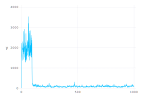

In [32]:
plot(y=κᵤ, Geom.line)

In [38]:
κ̂ᵤ

87.13139034292715

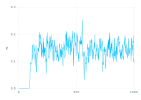

In [34]:
plot(y=μ[1, :], Geom.line)

In [36]:
using Mamba

sim = Chains(
    copy(θ'), 
    names=[
        "κᵤ", 
        "μ1",
        "μ2", 
        "μ3", 
        "μ4", 
        "μ5", 
        "μ6", 
        "μ7", 
        "μ8", 
        "μ9",
        "μ10",
        "μ11", 
        "μ12", 
        "μ13", 
        "μ14", 
        "μ15", 
        "μ16", 
        "μ17", 
        "μ18",
        "μ19",
        "μ20", 
        "μ21", 
        "μ22", 
        "μ23", 
        "μ24", 
        "μ25", 
        "μ26", 
        "μ27",
        "μ28",
        "μ29", 
        "μ30", 
        "μ31", 
        "μ32", 
        "μ33", 
        "μ34", 
        "μ35", 
        "μ36"
    ]
);

summarystats(sim)

         Mean           SD         Naive SE         MCSE          ESS   
 κᵤ 264.124065444 559.491134800 17.69266316640 174.4288420523  10.288447
 μ1   0.127948242   0.050505877  0.00159713605   0.0141297633  12.776563
 μ2   0.084391460   0.038705654  0.00122398024   0.0093780558  17.034257
 μ3   0.018075105   0.028282037  0.00089435655   0.0027992258 102.081145
 μ4   0.027278095   0.026588987  0.00084081761   0.0030016547  78.466111
 μ5  -0.011205486   0.028637375  0.00090559331   0.0031353727  83.423433
 μ6  -0.055584727   0.035582060  0.00112520354   0.0067011425  28.194505
 μ7   0.147510367   0.054842516  0.00173427263   0.0158999122  11.897214
 μ8   0.073008134   0.035668145  0.00112792577   0.0081384155  19.207963
 μ9   0.014361524   0.026320593  0.00083233022   0.0031509681  69.775558
μ10  -0.022674387   0.026622993  0.00084189296   0.0034520007  59.480143
μ11  -0.067506842   0.035287521  0.00111588941   0.0076525071  21.263504
μ12  -0.077622156   0.035816666  0.00113262242   0.